##  <center> <------ Word Embedding ------></center>

#### Word Embeddings are dense vector representations of words in low dimensional vector space. It is capable of capturing context of a word in a document,semantic and syntactic similarity, relation with other word etc. Word2Vec is the most popular word embedding model.

This Notebook will cover following topics,
- > Train our new word2vec from scratch. 
- >Use existing word2vec word embedding model on text data.
- >How to visualize a trained word embedding model using Principal Component Analysis.
- >How to load pre-trained word2vec and GloVe word embedding models from Google and Stanford.


In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

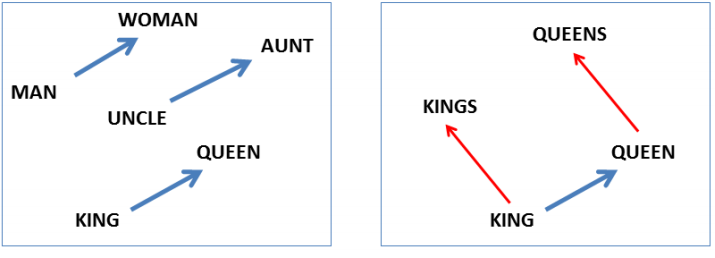

In [2]:
Image(filename='word_embedding.png')

There are two variants of training word2vec model
1. CBOW (Continous Bag of Word): It tries to predict a word on based on its neighbour.
2. SkipGram: It tries to predict the neighbours of a given word.

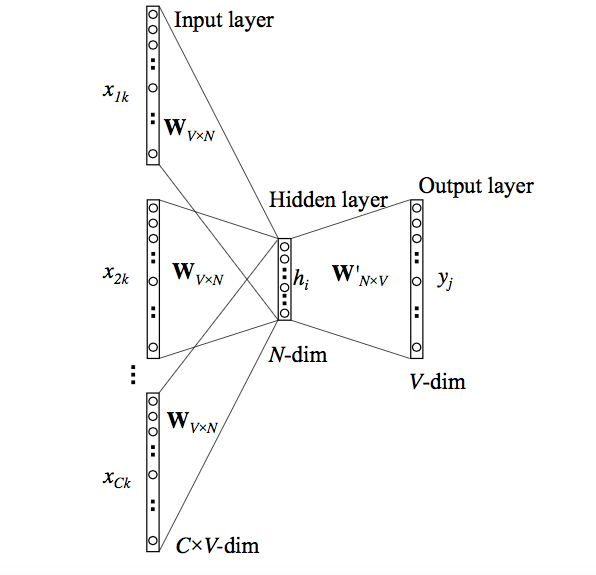

In [3]:
Image(filename='cbow.png', width=500, height=500)
# Example of Continous Bag of Words algorithm

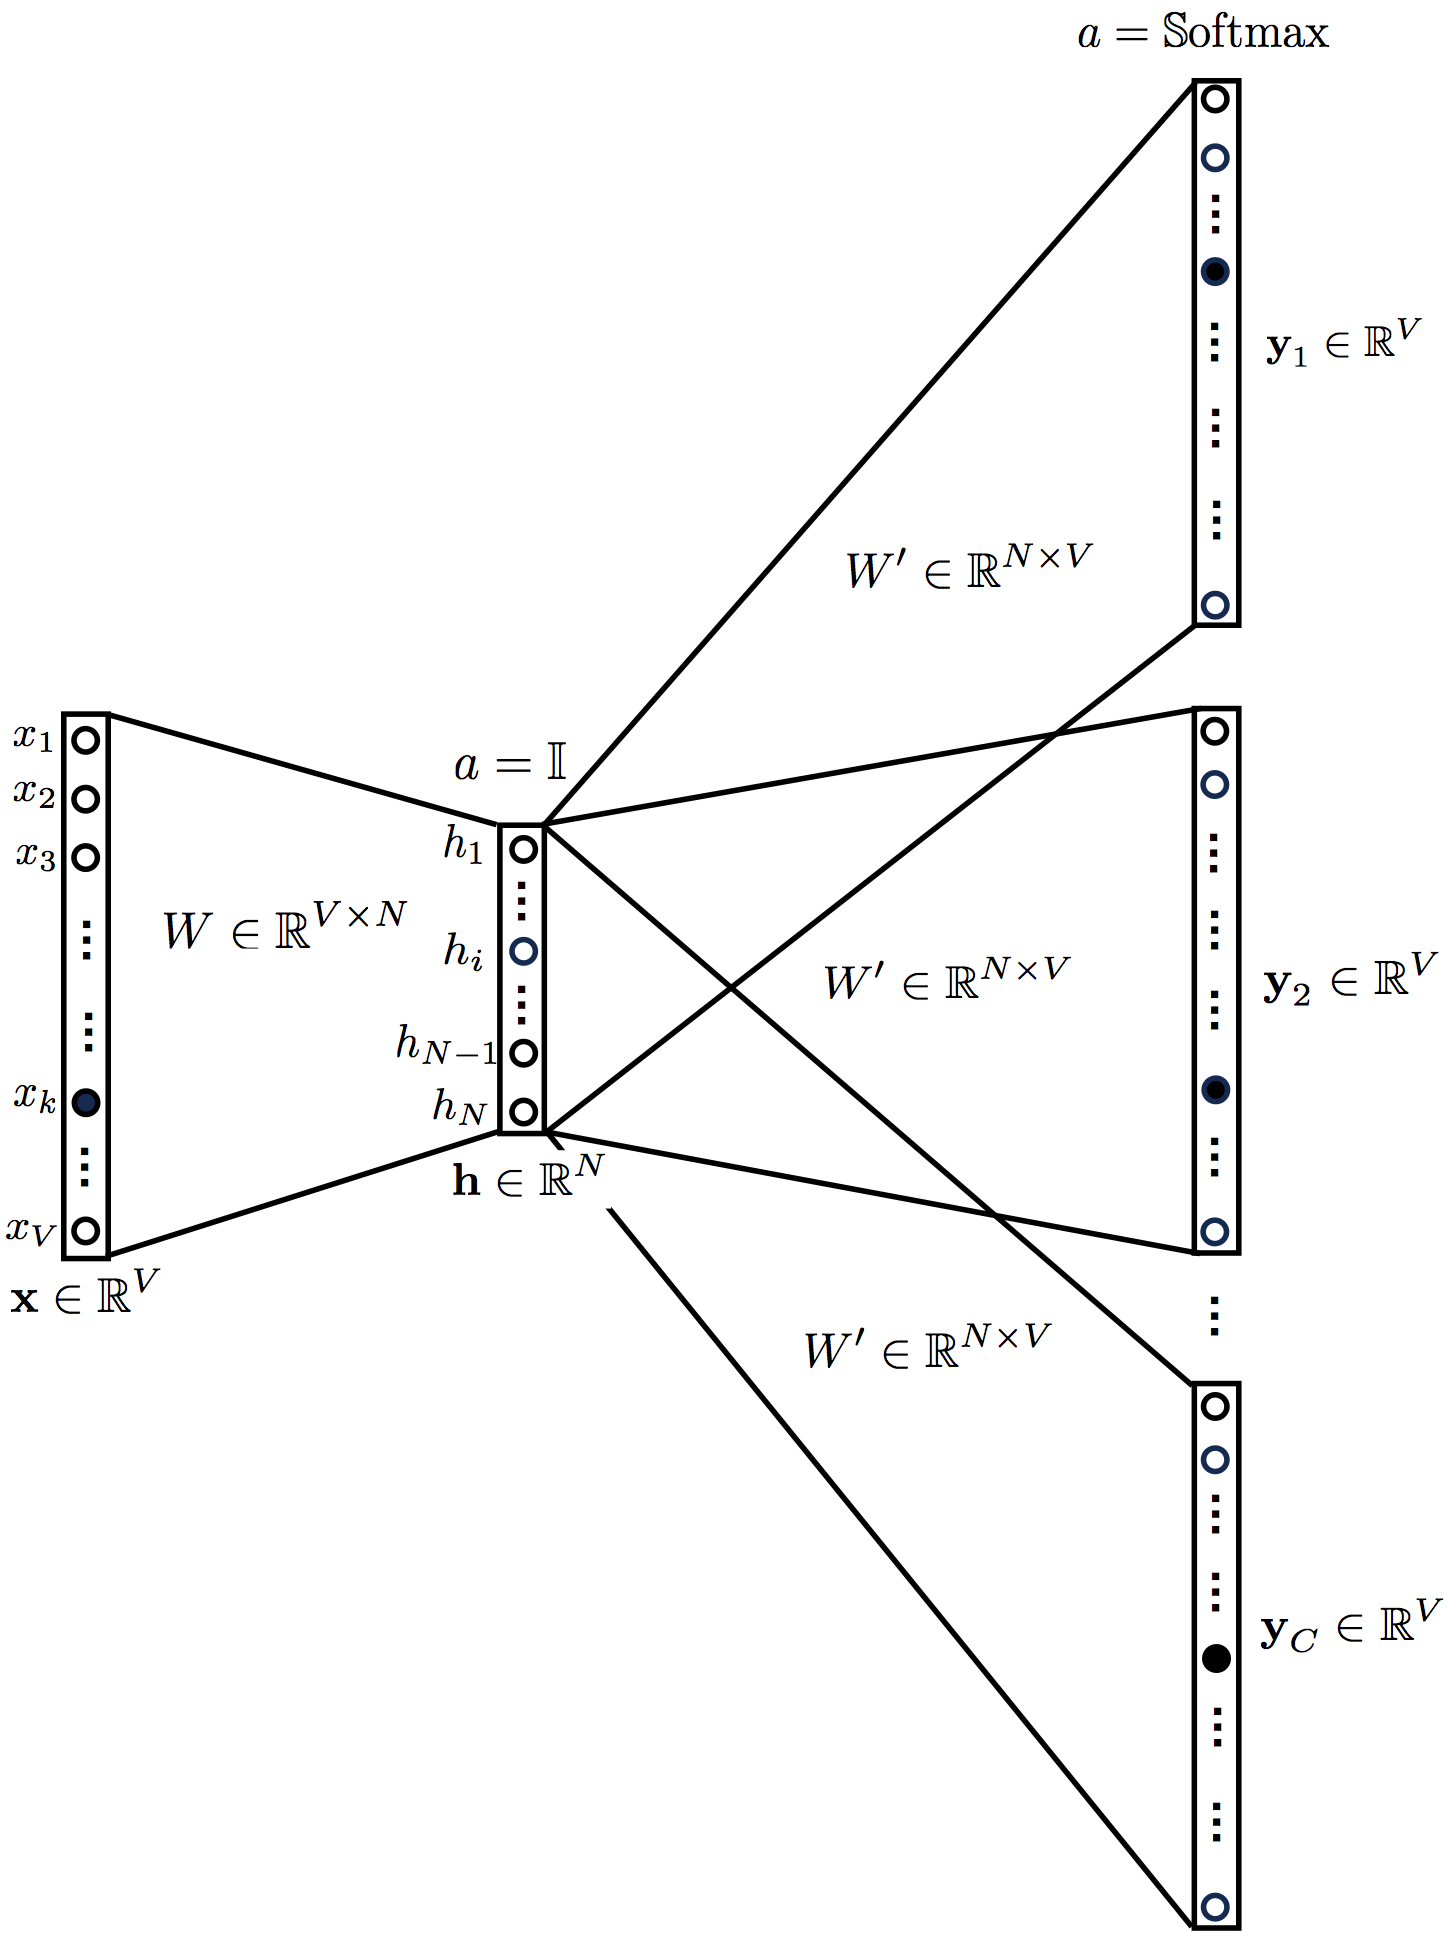

In [4]:
Image(filename='skipgram.png', width=400, height=400)
# Example of SkipGram algorithm

Steps to train the word2vec algorithm using skipgram:
1. Build a 3 layer neural network.
2. The objective of network is to predict the neighbouring word given a word.
3. Remove the last layer and keep the input and hidden layer.
4. Now, input a word from within the vocubulary. the output given at the hidden layer is the 'word embedding' of the input.

In [5]:
import numpy as np
import tensorflow as tf

In [6]:
corpus_raw = 'He is the king . The king is royal . She is the royal queen'
corpus_raw = corpus_raw.lower()

In [7]:
words = []
for word in corpus_raw.split():
    if word != '.':
        words.append(word)
        

In [8]:
words = set(words)

In [9]:
words

{'he', 'is', 'king', 'queen', 'royal', 'she', 'the'}

In [10]:
word2int = {}
int2word = {}
vocab_size = len(words)

for index, word in enumerate(words):
    word2int[word]=index
    int2word[index]=word

In [11]:
word2int

{'she': 0, 'is': 1, 'royal': 2, 'he': 3, 'the': 4, 'king': 5, 'queen': 6}

In [12]:
int2word

{0: 'she', 1: 'is', 2: 'royal', 3: 'he', 4: 'the', 5: 'king', 6: 'queen'}

In [13]:
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [14]:
print(raw_sentences)

['he is the king ', ' the king is royal ', ' she is the royal queen']


In [15]:
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [16]:
data = []
WINDOW_SIZE = 2

def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0):min(word_index + WINDOW_SIZE, len(sentence))+1]:
            if nb_word != word:
                data.append([word, nb_word])
data

[['he', 'is'],
 ['he', 'the'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [17]:
x_train = []
y_train = []
for data_word in data:
    x_train.append(to_one_hot( word2int[data_word[0]], vocab_size))
    y_train.append(to_one_hot( word2int[data_word[1]], vocab_size))

In [18]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print(x_train.shape, y_train.shape)

(34, 7) (34, 7)


In [19]:
y_train

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
 

#### implement a 3 layer (input, hidden, output) neural network using tensorflow.

In [20]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [21]:
EMBEDDING_DIM = 5
W1 = tf.Variable(tf.random.uniform([vocab_size, EMBEDDING_DIM ], minval=0, maxval=1))
b1 = tf.Variable(tf.random.uniform([EMBEDDING_DIM], minval=0, maxval=1))
hidden_representation = tf.add(tf.matmul(x, W1), b1)

In [22]:
W2 = tf.Variable(tf.random.uniform([EMBEDDING_DIM, vocab_size], minval=0, maxval=1))
b2 = tf.Variable(tf.random.uniform([vocab_size], minval=0, maxval=1))
prediction = tf.add(tf.matmul(hidden_representation, W2), b2)

In [23]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

In [24]:
# define the loss function
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# train steps
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  -0.8615386
loss is :  -0.8656941
loss is :  -0.8698264
loss is :  -0.87393576
loss is :  -0.87802255
loss is :  -0.8820872
loss is :  -0.8861298
loss is :  -0.8901506
loss is :  -0.89415026
loss is :  -0.89812875
loss is :  -0.9020863
loss is :  -0.90602326
loss is :  -0.90994006
loss is :  -0.91383666
loss is :  -0.9177134
loss is :  -0.9215706
loss is :  -0.9254085
loss is :  -0.92922723
loss is :  -0.93302697
loss is :  -0.9368082
loss is :  -0.940571
loss is :  -0.9443155
loss is :  -0.94804204
loss is :  -0.9517507
loss is :  -0.9554419
loss is :  -0.9591155
loss is :  -0.9627719
loss is :  -0.96641135
loss is :  -0.9700341
loss is :  -0.9736401
loss is :  -0.9772296
loss is :  -0.9808029
loss is :  -0.9843601
loss is :  -0.9879012
loss is :  -0.9914267
loss is :  -0.9949365
loss is :  -0.9984309
loss is :  -1.0019101
loss is :  -1.005374
loss is :  -1.008823
loss is :  -1.0122573
loss is :  -1.015677
loss is :  -1.0190821
loss is :  -1.0224727
loss is :  -1.0258492
los

loss is :  -1.8561672
loss is :  -1.8575202
loss is :  -1.8588716
loss is :  -1.8602209
loss is :  -1.8615685
loss is :  -1.8629142
loss is :  -1.8642583
loss is :  -1.8656001
loss is :  -1.8669404
loss is :  -1.8682789
loss is :  -1.8696154
loss is :  -1.8709501
loss is :  -1.872283
loss is :  -1.8736142
loss is :  -1.8749435
loss is :  -1.8762711
loss is :  -1.8775969
loss is :  -1.8789208
loss is :  -1.880243
loss is :  -1.8815633
loss is :  -1.8828819
loss is :  -1.8841988
loss is :  -1.885514
loss is :  -1.8868271
loss is :  -1.8881389
loss is :  -1.8894488
loss is :  -1.890757
loss is :  -1.8920631
loss is :  -1.8933678
loss is :  -1.8946708
loss is :  -1.8959719
loss is :  -1.8972715
loss is :  -1.8985692
loss is :  -1.8998653
loss is :  -1.9011596
loss is :  -1.9024523
loss is :  -1.903743
loss is :  -1.9050326
loss is :  -1.9063202
loss is :  -1.907606
loss is :  -1.9088902
loss is :  -1.9101728
loss is :  -1.9114537
loss is :  -1.9127332
loss is :  -1.9140104
loss is :  -1.91

loss is :  -2.338818
loss is :  -2.339652
loss is :  -2.3404856
loss is :  -2.3413181
loss is :  -2.3421502
loss is :  -2.3429816
loss is :  -2.343812
loss is :  -2.344642
loss is :  -2.3454711
loss is :  -2.3463
loss is :  -2.347128
loss is :  -2.347955
loss is :  -2.3487818
loss is :  -2.3496072
loss is :  -2.3504326
loss is :  -2.351257
loss is :  -2.3520808
loss is :  -2.3529038
loss is :  -2.3537269
loss is :  -2.3545482
loss is :  -2.3553696
loss is :  -2.35619
loss is :  -2.3570096
loss is :  -2.357829
loss is :  -2.3586476
loss is :  -2.3594654
loss is :  -2.3602824
loss is :  -2.361099
loss is :  -2.361915
loss is :  -2.36273
loss is :  -2.363545
loss is :  -2.3643587
loss is :  -2.3651717
loss is :  -2.3659842
loss is :  -2.3667963
loss is :  -2.3676074
loss is :  -2.368418
loss is :  -2.369228
loss is :  -2.370037
loss is :  -2.3708456
loss is :  -2.3716538
loss is :  -2.3724613
loss is :  -2.373268
loss is :  -2.374074
loss is :  -2.3748796
loss is :  -2.3756843
loss is :  

loss is :  -2.6427765
loss is :  -2.6433935
loss is :  -2.644011
loss is :  -2.6446283
loss is :  -2.6452444
loss is :  -2.6458607
loss is :  -2.6464765
loss is :  -2.6470919
loss is :  -2.647707
loss is :  -2.6483216
loss is :  -2.6489356
loss is :  -2.6495495
loss is :  -2.6501634
loss is :  -2.6507766
loss is :  -2.651389
loss is :  -2.6520019
loss is :  -2.6526136
loss is :  -2.6532252
loss is :  -2.6538367
loss is :  -2.6544476
loss is :  -2.6550581
loss is :  -2.6556685
loss is :  -2.6562784
loss is :  -2.6568878
loss is :  -2.657497
loss is :  -2.6581059
loss is :  -2.6587138
loss is :  -2.659322
loss is :  -2.6599295
loss is :  -2.660537
loss is :  -2.6611438
loss is :  -2.6617503
loss is :  -2.6623564
loss is :  -2.6629624
loss is :  -2.663568
loss is :  -2.664173
loss is :  -2.6647778
loss is :  -2.6653821
loss is :  -2.665986
loss is :  -2.66659
loss is :  -2.6671932
loss is :  -2.6677961
loss is :  -2.6683986
loss is :  -2.6690009
loss is :  -2.6696026
loss is :  -2.6702044

loss is :  -2.8674312
loss is :  -2.867926
loss is :  -2.8684208
loss is :  -2.8689156
loss is :  -2.8694098
loss is :  -2.869904
loss is :  -2.8703976
loss is :  -2.8708913
loss is :  -2.8713849
loss is :  -2.871878
loss is :  -2.872371
loss is :  -2.8728635
loss is :  -2.873356
loss is :  -2.8738482
loss is :  -2.87434
loss is :  -2.8748317
loss is :  -2.8753235
loss is :  -2.8758144
loss is :  -2.8763056
loss is :  -2.8767962
loss is :  -2.877287
loss is :  -2.877777
loss is :  -2.8782673
loss is :  -2.878757
loss is :  -2.879247
loss is :  -2.879736
loss is :  -2.880225
loss is :  -2.880714
loss is :  -2.8812027
loss is :  -2.8816912
loss is :  -2.8821793
loss is :  -2.882667
loss is :  -2.8831549
loss is :  -2.8836422
loss is :  -2.8841298
loss is :  -2.8846166
loss is :  -2.8851032
loss is :  -2.8855898
loss is :  -2.8860762
loss is :  -2.886562
loss is :  -2.8870482
loss is :  -2.8875337
loss is :  -2.888019
loss is :  -2.888504
loss is :  -2.8889892
loss is :  -2.889474
loss is

loss is :  -3.0566506
loss is :  -3.057062
loss is :  -3.0574727
loss is :  -3.057883
loss is :  -3.0582938
loss is :  -3.058704
loss is :  -3.0591145
loss is :  -3.0595238
loss is :  -3.0599341
loss is :  -3.0603437
loss is :  -3.0607533
loss is :  -3.0611625
loss is :  -3.0615716
loss is :  -3.0619807
loss is :  -3.0623896
loss is :  -3.0627983
loss is :  -3.0632067
loss is :  -3.063615
loss is :  -3.0640235
loss is :  -3.0644314
loss is :  -3.0648394
loss is :  -3.0652468
loss is :  -3.0656543
loss is :  -3.0660617
loss is :  -3.066469
loss is :  -3.0668762
loss is :  -3.0672827
loss is :  -3.0676894
loss is :  -3.068096
loss is :  -3.0685024
loss is :  -3.0689087
loss is :  -3.069315
loss is :  -3.0697207
loss is :  -3.0701268
loss is :  -3.0705318
loss is :  -3.0709374
loss is :  -3.0713427
loss is :  -3.0717478
loss is :  -3.0721529
loss is :  -3.0725574
loss is :  -3.072962
loss is :  -3.0733664
loss is :  -3.0737708
loss is :  -3.074175
loss is :  -3.0745792
loss is :  -3.07498

loss is :  -3.207646
loss is :  -3.2080002
loss is :  -3.2083542
loss is :  -3.2087083
loss is :  -3.2090626
loss is :  -3.2094164
loss is :  -3.20977
loss is :  -3.210123
loss is :  -3.210477
loss is :  -3.21083
loss is :  -3.2111833
loss is :  -3.2115362
loss is :  -3.211889
loss is :  -3.2122421
loss is :  -3.2125947
loss is :  -3.2129471
loss is :  -3.2132995
loss is :  -3.2136517
loss is :  -3.214004
loss is :  -3.214356
loss is :  -3.214708
loss is :  -3.2150598
loss is :  -3.2154117
loss is :  -3.215763
loss is :  -3.2161145
loss is :  -3.216466
loss is :  -3.216817
loss is :  -3.2171683
loss is :  -3.217519
loss is :  -3.21787
loss is :  -3.2182205
loss is :  -3.2185712
loss is :  -3.218922
loss is :  -3.219272
loss is :  -3.2196221
loss is :  -3.2199726
loss is :  -3.2203226
loss is :  -3.2206724
loss is :  -3.2210221
loss is :  -3.221372
loss is :  -3.2217214
loss is :  -3.2220707
loss is :  -3.22242
loss is :  -3.2227693
loss is :  -3.223118
loss is :  -3.223467
loss is :  -

loss is :  -3.3459108
loss is :  -3.34622
loss is :  -3.346529
loss is :  -3.346838
loss is :  -3.347147
loss is :  -3.347456
loss is :  -3.3477645
loss is :  -3.348073
loss is :  -3.348382
loss is :  -3.3486903
loss is :  -3.3489985
loss is :  -3.3493066
loss is :  -3.349615
loss is :  -3.3499231
loss is :  -3.350231
loss is :  -3.3505387
loss is :  -3.3508472
loss is :  -3.3511546
loss is :  -3.3514621
loss is :  -3.3517697
loss is :  -3.352077
loss is :  -3.3523843
loss is :  -3.352692
loss is :  -3.3529987
loss is :  -3.353306
loss is :  -3.353613
loss is :  -3.3539197
loss is :  -3.3542268
loss is :  -3.3545332
loss is :  -3.35484
loss is :  -3.3551464
loss is :  -3.3554528
loss is :  -3.3557591
loss is :  -3.3560655
loss is :  -3.3563716
loss is :  -3.3566775
loss is :  -3.3569837
loss is :  -3.3572893
loss is :  -3.3575952
loss is :  -3.357901
loss is :  -3.3582065
loss is :  -3.358512
loss is :  -3.3588173
loss is :  -3.3591228
loss is :  -3.359428
loss is :  -3.359733
loss is 

loss is :  -3.4670448
loss is :  -3.4673193
loss is :  -3.4675937
loss is :  -3.4678679
loss is :  -3.4681423
loss is :  -3.4684165
loss is :  -3.4686906
loss is :  -3.4689648
loss is :  -3.4692385
loss is :  -3.4695125
loss is :  -3.4697862
loss is :  -3.4700599
loss is :  -3.4703336
loss is :  -3.4706073
loss is :  -3.4708807
loss is :  -3.471154
loss is :  -3.4714274
loss is :  -3.4717007
loss is :  -3.471974
loss is :  -3.472247
loss is :  -3.4725204
loss is :  -3.472793
loss is :  -3.473066
loss is :  -3.4733388
loss is :  -3.4736116
loss is :  -3.473884
loss is :  -3.4741569
loss is :  -3.4744294
loss is :  -3.474702
loss is :  -3.474974
loss is :  -3.4752467
loss is :  -3.4755187
loss is :  -3.475791
loss is :  -3.476063
loss is :  -3.4763353
loss is :  -3.476607
loss is :  -3.476879
loss is :  -3.477151
loss is :  -3.4774225
loss is :  -3.477694
loss is :  -3.4779656
loss is :  -3.4782374
loss is :  -3.4785087
loss is :  -3.47878
loss is :  -3.4790514
loss is :  -3.4793224
loss

loss is :  -3.5818975
loss is :  -3.582142
loss is :  -3.5823877
loss is :  -3.5826325
loss is :  -3.5828772
loss is :  -3.583122
loss is :  -3.5833673
loss is :  -3.583612
loss is :  -3.5838563
loss is :  -3.5841012
loss is :  -3.5843456
loss is :  -3.5845904
loss is :  -3.5848348
loss is :  -3.585079
loss is :  -3.585323
loss is :  -3.5855677
loss is :  -3.5858119
loss is :  -3.586056
loss is :  -3.5863001
loss is :  -3.5865443
loss is :  -3.5867882
loss is :  -3.587032
loss is :  -3.587276
loss is :  -3.5875196
loss is :  -3.5877633
loss is :  -3.5880072
loss is :  -3.588251
loss is :  -3.5884943
loss is :  -3.5887382
loss is :  -3.5889816
loss is :  -3.5892248
loss is :  -3.5894682
loss is :  -3.5897117
loss is :  -3.589955
loss is :  -3.5901978
loss is :  -3.5904408
loss is :  -3.5906837
loss is :  -3.590927
loss is :  -3.5911698
loss is :  -3.591413
loss is :  -3.5916557
loss is :  -3.5918982
loss is :  -3.592141
loss is :  -3.5923836
loss is :  -3.5926263
loss is :  -3.5928688
l

loss is :  -3.6772838
loss is :  -3.6775072
loss is :  -3.6777303
loss is :  -3.6779532
loss is :  -3.6781762
loss is :  -3.6783988
loss is :  -3.6786218
loss is :  -3.6788445
loss is :  -3.6790676
loss is :  -3.67929
loss is :  -3.679513
loss is :  -3.6797352
loss is :  -3.679958
loss is :  -3.6801808
loss is :  -3.680403
loss is :  -3.6806254
loss is :  -3.6808476
loss is :  -3.6810703
loss is :  -3.6812925
loss is :  -3.6815147
loss is :  -3.6817367
loss is :  -3.6819592
loss is :  -3.682181
loss is :  -3.682403
loss is :  -3.682625
loss is :  -3.682847
loss is :  -3.6830692
loss is :  -3.6832907
loss is :  -3.6835124
loss is :  -3.6837344
loss is :  -3.683956
loss is :  -3.6841779
loss is :  -3.6843991
loss is :  -3.684621
loss is :  -3.6848426
loss is :  -3.685064
loss is :  -3.6852853
loss is :  -3.6855063
loss is :  -3.685728
loss is :  -3.685949
loss is :  -3.6861703
loss is :  -3.6863916
loss is :  -3.6866126
loss is :  -3.6868339
loss is :  -3.6870546
loss is :  -3.6872756
lo

loss is :  -3.7654898
loss is :  -3.7656941
loss is :  -3.7658987
loss is :  -3.7661026
loss is :  -3.7663076
loss is :  -3.766512
loss is :  -3.766716
loss is :  -3.76692
loss is :  -3.7671244
loss is :  -3.7673285
loss is :  -3.7675333
loss is :  -3.767737
loss is :  -3.7679412
loss is :  -3.7681448
loss is :  -3.7683492
loss is :  -3.7685528
loss is :  -3.768757
loss is :  -3.768961
loss is :  -3.7691646
loss is :  -3.7693684
loss is :  -3.769572
loss is :  -3.7697759
loss is :  -3.7699795
loss is :  -3.7701828
loss is :  -3.7703867
loss is :  -3.7705903
loss is :  -3.7707937
loss is :  -3.7709975
loss is :  -3.7712007
loss is :  -3.7714045
loss is :  -3.7716079
loss is :  -3.7718105
loss is :  -3.772014
loss is :  -3.7722173
loss is :  -3.7724206
loss is :  -3.7726238
loss is :  -3.7728267
loss is :  -3.77303
loss is :  -3.773233
loss is :  -3.7734356
loss is :  -3.7736385
loss is :  -3.7738414
loss is :  -3.7740443
loss is :  -3.7742472
loss is :  -3.77445
loss is :  -3.7746527
lo

loss is :  -3.848329
loss is :  -3.8485174
loss is :  -3.848706
loss is :  -3.8488941
loss is :  -3.8490825
loss is :  -3.849271
loss is :  -3.8494594
loss is :  -3.8496475
loss is :  -3.849836
loss is :  -3.850024
loss is :  -3.8502126
loss is :  -3.8504007
loss is :  -3.8505886
loss is :  -3.8507767
loss is :  -3.8509648
loss is :  -3.8511524
loss is :  -3.8513403
loss is :  -3.851529
loss is :  -3.8517165
loss is :  -3.8519044
loss is :  -3.852092
loss is :  -3.8522797
loss is :  -3.8524678
loss is :  -3.8526554
loss is :  -3.8528428
loss is :  -3.853031
loss is :  -3.853218
loss is :  -3.8534057
loss is :  -3.8535933
loss is :  -3.8537807
loss is :  -3.8539684
loss is :  -3.8541555
loss is :  -3.8543427
loss is :  -3.8545303
loss is :  -3.8547175
loss is :  -3.8549051
loss is :  -3.8550923
loss is :  -3.8552794
loss is :  -3.8554666
loss is :  -3.8556538
loss is :  -3.8558407
loss is :  -3.8560278
loss is :  -3.856215
loss is :  -3.8564022
loss is :  -3.8565893
loss is :  -3.856776

loss is :  -3.924031
loss is :  -3.924206
loss is :  -3.9243805
loss is :  -3.924555
loss is :  -3.9247303
loss is :  -3.9249053
loss is :  -3.9250793
loss is :  -3.9252548
loss is :  -3.9254289
loss is :  -3.9256039
loss is :  -3.9257786
loss is :  -3.9259531
loss is :  -3.9261277
loss is :  -3.9263022
loss is :  -3.9264765
loss is :  -3.9266515
loss is :  -3.9268255
loss is :  -3.927
loss is :  -3.9271743
loss is :  -3.9273489
loss is :  -3.9275234
loss is :  -3.9276977
loss is :  -3.9278717
loss is :  -3.9280457
loss is :  -3.92822
loss is :  -3.928394
loss is :  -3.9285686
loss is :  -3.9287424
loss is :  -3.928917
loss is :  -3.929091
loss is :  -3.9292648
loss is :  -3.9294388
loss is :  -3.929613
loss is :  -3.9297867
loss is :  -3.9299607
loss is :  -3.9301345
loss is :  -3.930308
loss is :  -3.9304824
loss is :  -3.930656
loss is :  -3.93083
loss is :  -3.9310033
loss is :  -3.9311771
loss is :  -3.9313512
loss is :  -3.9315243
loss is :  -3.9316986
loss is :  -3.9318717
loss 

loss is :  -3.9946284
loss is :  -3.9947913
loss is :  -3.9949548
loss is :  -3.9951177
loss is :  -3.9952805
loss is :  -3.9954438
loss is :  -3.995607
loss is :  -3.9957697
loss is :  -3.9959326
loss is :  -3.9960957
loss is :  -3.9962585
loss is :  -3.9964213
loss is :  -3.996584
loss is :  -3.9967468
loss is :  -3.9969096
loss is :  -3.9970725
loss is :  -3.9972355
loss is :  -3.997398
loss is :  -3.9975607
loss is :  -3.9977233
loss is :  -3.9978857
loss is :  -3.9980488
loss is :  -3.9982111
loss is :  -3.9983735
loss is :  -3.998536
loss is :  -3.9986985
loss is :  -3.9988613
loss is :  -3.9990234
loss is :  -3.9991858
loss is :  -3.9993484
loss is :  -3.9995108
loss is :  -3.999673
loss is :  -3.9998353
loss is :  -3.9999974
loss is :  -4.00016
loss is :  -4.0003223
loss is :  -4.0004845
loss is :  -4.0006466
loss is :  -4.000809
loss is :  -4.0009713
loss is :  -4.001133
loss is :  -4.001295
loss is :  -4.001457
loss is :  -4.0016193
loss is :  -4.0017815
loss is :  -4.0019436

loss is :  -4.060316
loss is :  -4.060469
loss is :  -4.0606217
loss is :  -4.0607743
loss is :  -4.0609274
loss is :  -4.06108
loss is :  -4.0612326
loss is :  -4.0613856
loss is :  -4.061538
loss is :  -4.061691
loss is :  -4.061844
loss is :  -4.0619965
loss is :  -4.0621495
loss is :  -4.0623016
loss is :  -4.062454
loss is :  -4.062607
loss is :  -4.062759
loss is :  -4.062912
loss is :  -4.0630646
loss is :  -4.0632167
loss is :  -4.0633698
loss is :  -4.0635214
loss is :  -4.0636744
loss is :  -4.0638266
loss is :  -4.0639787
loss is :  -4.064131
loss is :  -4.0642834
loss is :  -4.064435
loss is :  -4.0645876
loss is :  -4.064739
loss is :  -4.064892
loss is :  -4.0650444
loss is :  -4.0651965
loss is :  -4.065349
loss is :  -4.065501
loss is :  -4.065653
loss is :  -4.065805
loss is :  -4.0659575
loss is :  -4.0661087
loss is :  -4.0662613
loss is :  -4.0664134
loss is :  -4.066565
loss is :  -4.066717
loss is :  -4.066869
loss is :  -4.0670204
loss is :  -4.067173
loss is :  

loss is :  -4.1207027
loss is :  -4.1208467
loss is :  -4.1209908
loss is :  -4.121135
loss is :  -4.121279
loss is :  -4.121423
loss is :  -4.121567
loss is :  -4.1217103
loss is :  -4.1218543
loss is :  -4.121998
loss is :  -4.122143
loss is :  -4.122286
loss is :  -4.1224294
loss is :  -4.122573
loss is :  -4.122717
loss is :  -4.1228604
loss is :  -4.123005
loss is :  -4.1231484
loss is :  -4.1232924
loss is :  -4.1234355
loss is :  -4.123579
loss is :  -4.1237226
loss is :  -4.1238666
loss is :  -4.12401
loss is :  -4.124153
loss is :  -4.124297
loss is :  -4.1244407
loss is :  -4.124584
loss is :  -4.1247277
loss is :  -4.1248713
loss is :  -4.1250143
loss is :  -4.125158
loss is :  -4.1253014
loss is :  -4.125445
loss is :  -4.125588
loss is :  -4.1257315
loss is :  -4.125874
loss is :  -4.1260185
loss is :  -4.126161
loss is :  -4.126305
loss is :  -4.1264477
loss is :  -4.1265907
loss is :  -4.1267347
loss is :  -4.1268773
loss is :  -4.12702
loss is :  -4.1271634
loss is :  -

loss is :  -4.178231
loss is :  -4.178367
loss is :  -4.1785026
loss is :  -4.1786385
loss is :  -4.178775
loss is :  -4.178911
loss is :  -4.179047
loss is :  -4.1791825
loss is :  -4.1793184
loss is :  -4.179455
loss is :  -4.1795907
loss is :  -4.1797266
loss is :  -4.1798625
loss is :  -4.179998
loss is :  -4.180134
loss is :  -4.1802697
loss is :  -4.1804056
loss is :  -4.180541
loss is :  -4.180677
loss is :  -4.180813
loss is :  -4.1809487
loss is :  -4.181084
loss is :  -4.1812196
loss is :  -4.1813555
loss is :  -4.1814914
loss is :  -4.181627
loss is :  -4.181762
loss is :  -4.181898
loss is :  -4.1820335
loss is :  -4.1821685
loss is :  -4.182305
loss is :  -4.18244
loss is :  -4.182575
loss is :  -4.1827106
loss is :  -4.182847
loss is :  -4.182982
loss is :  -4.183117
loss is :  -4.183253
loss is :  -4.1833878
loss is :  -4.1835227
loss is :  -4.183659
loss is :  -4.183794
loss is :  -4.1839294
loss is :  -4.1840644
loss is :  -4.1842
loss is :  -4.184335
loss is :  -4.184

loss is :  -4.230854
loss is :  -4.2309837
loss is :  -4.231113
loss is :  -4.231242
loss is :  -4.231371
loss is :  -4.2315
loss is :  -4.231629
loss is :  -4.2317586
loss is :  -4.231887
loss is :  -4.2320166
loss is :  -4.232145
loss is :  -4.232274
loss is :  -4.232403
loss is :  -4.2325325
loss is :  -4.2326612
loss is :  -4.23279
loss is :  -4.232919
loss is :  -4.2330475
loss is :  -4.2331767
loss is :  -4.2333055
loss is :  -4.233434
loss is :  -4.2335634
loss is :  -4.233692
loss is :  -4.233821
loss is :  -4.23395
loss is :  -4.234079
loss is :  -4.234207
loss is :  -4.234336
loss is :  -4.234464
loss is :  -4.234593
loss is :  -4.2347217
loss is :  -4.2348504
loss is :  -4.234979
loss is :  -4.235108
loss is :  -4.235236
loss is :  -4.2353644
loss is :  -4.2354937
loss is :  -4.2356224
loss is :  -4.2357516
loss is :  -4.2358794
loss is :  -4.2360077
loss is :  -4.236136
loss is :  -4.2362647
loss is :  -4.236393
loss is :  -4.2365217
loss is :  -4.23665
loss is :  -4.236778

loss is :  -4.2852893
loss is :  -4.285412
loss is :  -4.285534
loss is :  -4.285656
loss is :  -4.285778
loss is :  -4.2859
loss is :  -4.286023
loss is :  -4.286145
loss is :  -4.286267
loss is :  -4.28639
loss is :  -4.286512
loss is :  -4.286634
loss is :  -4.2867565
loss is :  -4.2868786
loss is :  -4.2870007
loss is :  -4.2871227
loss is :  -4.2872453
loss is :  -4.2873673
loss is :  -4.28749
loss is :  -4.2876115
loss is :  -4.2877336
loss is :  -4.287856
loss is :  -4.287977
loss is :  -4.2881
loss is :  -4.288222
loss is :  -4.288344
loss is :  -4.288466
loss is :  -4.2885885
loss is :  -4.2887096
loss is :  -4.2888317
loss is :  -4.288954
loss is :  -4.289076
loss is :  -4.2891974
loss is :  -4.2893195
loss is :  -4.2894416
loss is :  -4.289563
loss is :  -4.289685
loss is :  -4.2898073
loss is :  -4.2899284
loss is :  -4.2900505
loss is :  -4.2901726
loss is :  -4.2902946
loss is :  -4.2904167
loss is :  -4.290539
loss is :  -4.29066
loss is :  -4.2907815
loss is :  -4.29090

loss is :  -4.335544
loss is :  -4.33566
loss is :  -4.3357763
loss is :  -4.335893
loss is :  -4.3360095
loss is :  -4.336126
loss is :  -4.336242
loss is :  -4.3363585
loss is :  -4.3364744
loss is :  -4.336591
loss is :  -4.336707
loss is :  -4.3368235
loss is :  -4.3369403
loss is :  -4.3370557
loss is :  -4.337172
loss is :  -4.337289
loss is :  -4.337405
loss is :  -4.337521
loss is :  -4.3376374
loss is :  -4.337754
loss is :  -4.33787
loss is :  -4.337986
loss is :  -4.3381023
loss is :  -4.3382187
loss is :  -4.338335
loss is :  -4.3384514
loss is :  -4.3385663
loss is :  -4.3386827
loss is :  -4.338799
loss is :  -4.338915
loss is :  -4.339031
loss is :  -4.3391466
loss is :  -4.3392625
loss is :  -4.339379
loss is :  -4.339495
loss is :  -4.339611
loss is :  -4.3397274
loss is :  -4.339843
loss is :  -4.339959
loss is :  -4.340075
loss is :  -4.340191
loss is :  -4.3403063
loss is :  -4.3404226
loss is :  -4.3405385
loss is :  -4.3406544
loss is :  -4.3407707
loss is :  -4.3

loss is :  -4.384193
loss is :  -4.384304
loss is :  -4.384415
loss is :  -4.3845253
loss is :  -4.384637
loss is :  -4.3847475
loss is :  -4.3848586
loss is :  -4.384969
loss is :  -4.385081
loss is :  -4.385191
loss is :  -4.3853025
loss is :  -4.3854127
loss is :  -4.385524
loss is :  -4.385635
loss is :  -4.3857455
loss is :  -4.385856
loss is :  -4.3859673
loss is :  -4.386078
loss is :  -4.3861885
loss is :  -4.3862996
loss is :  -4.3864098
loss is :  -4.386521
loss is :  -4.386631
loss is :  -4.3867426
loss is :  -4.3868527
loss is :  -4.3869634
loss is :  -4.387074
loss is :  -4.3871846
loss is :  -4.3872952
loss is :  -4.387406
loss is :  -4.3875165
loss is :  -4.3876266
loss is :  -4.3877378
loss is :  -4.387849
loss is :  -4.387959
loss is :  -4.388069
loss is :  -4.38818
loss is :  -4.388291
loss is :  -4.388401
loss is :  -4.3885117
loss is :  -4.3886223
loss is :  -4.388733
loss is :  -4.3888435
loss is :  -4.3889537
loss is :  -4.3890643
loss is :  -4.389175
loss is :  -

loss is :  -4.429015
loss is :  -4.4291205
loss is :  -4.4292264
loss is :  -4.429333
loss is :  -4.4294395
loss is :  -4.429546
loss is :  -4.4296517
loss is :  -4.429758
loss is :  -4.429864
loss is :  -4.42997
loss is :  -4.430075
loss is :  -4.430182
loss is :  -4.430288
loss is :  -4.430393
loss is :  -4.4305
loss is :  -4.430606
loss is :  -4.4307117
loss is :  -4.430818
loss is :  -4.430924
loss is :  -4.43103
loss is :  -4.4311357
loss is :  -4.431241
loss is :  -4.431348
loss is :  -4.4314537
loss is :  -4.4315596
loss is :  -4.4316654
loss is :  -4.431771
loss is :  -4.431877
loss is :  -4.431983
loss is :  -4.4320884
loss is :  -4.432194
loss is :  -4.4323006
loss is :  -4.432406
loss is :  -4.432512
loss is :  -4.4326177
loss is :  -4.432723
loss is :  -4.4328294
loss is :  -4.4329348
loss is :  -4.4330406
loss is :  -4.433147
loss is :  -4.4332523
loss is :  -4.433358
loss is :  -4.433463
loss is :  -4.4335694
loss is :  -4.4336743
loss is :  -4.4337807
loss is :  -4.43388

loss is :  -4.474167
loss is :  -4.474268
loss is :  -4.474369
loss is :  -4.4744706
loss is :  -4.474572
loss is :  -4.4746737
loss is :  -4.4747753
loss is :  -4.474877
loss is :  -4.4749784
loss is :  -4.4750795
loss is :  -4.475181
loss is :  -4.4752827
loss is :  -4.4753838
loss is :  -4.4754853
loss is :  -4.4755864
loss is :  -4.4756885
loss is :  -4.475789
loss is :  -4.47589
loss is :  -4.475992
loss is :  -4.4760933
loss is :  -4.476195
loss is :  -4.476296
loss is :  -4.476397
loss is :  -4.476498
loss is :  -4.4765997
loss is :  -4.476701
loss is :  -4.4768023
loss is :  -4.4769034
loss is :  -4.477005
loss is :  -4.477106
loss is :  -4.4772077
loss is :  -4.4773083
loss is :  -4.47741
loss is :  -4.4775114
loss is :  -4.4776115
loss is :  -4.477713
loss is :  -4.4778147
loss is :  -4.477916
loss is :  -4.4780164
loss is :  -4.4781175
loss is :  -4.478219
loss is :  -4.47832
loss is :  -4.4784207
loss is :  -4.478522
loss is :  -4.4786234
loss is :  -4.478724
loss is :  -4.

In [25]:
print(sess.run(W1))
print(sess.run(b1))

[[0.36599347 0.86464024 0.63614964 1.2328436  0.7921458 ]
 [1.2618912  2.2181451  1.8184129  1.3171513  2.157234  ]
 [0.96744764 0.73887914 1.1610017  1.3011906  1.4857434 ]
 [0.4430862  0.6665495  0.8415717  1.0938393  0.7957726 ]
 [1.5530432  1.3305714  1.7506474  1.7157892  1.5481285 ]
 [0.9772231  1.6126177  1.1199832  1.3558873  1.4008672 ]
 [1.1986344  0.9107122  1.1319013  0.31285375 1.1092304 ]]
[5.044077  5.1702642 5.64954   4.488689  6.651081 ]


In [26]:
vectors = sess.run(W1 + b1)

In [27]:
vectors

array([[5.4100704, 6.0349045, 6.2856894, 5.721533 , 7.443227 ],
       [6.3059683, 7.3884096, 7.4679527, 5.8058405, 8.808315 ],
       [6.0115247, 5.9091434, 6.8105416, 5.78988  , 8.136825 ],
       [5.487163 , 5.836814 , 6.4911118, 5.582528 , 7.4468536],
       [6.5971203, 6.5008354, 7.4001875, 6.2044783, 8.199209 ],
       [6.0213   , 6.7828817, 6.769523 , 5.8445764, 8.051949 ],
       [6.242711 , 6.0809765, 6.781441 , 4.8015428, 7.7603116]],
      dtype=float32)

In [28]:
print(vectors[ word2int['queen'] ])

[6.242711  6.0809765 6.781441  4.8015428 7.7603116]


In [29]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [38]:
print(int2word[find_closest(word2int['the'], vectors)])

king


There are many parameters on this constructor(Word2Vec()); a few noteworthy arguments you may wish to configure are:

* size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
* window: (default 5) The maximum distance between a target word and words around the target word.
* min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
* workers: (default 3) The number of threads to use while training.
* sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

In [31]:
from gensim.models import Word2Vec
# define training data
sentences = [['My', 'name', 'is', 'yogesh', 'chandra'],
            ['yogesh', 'lives', 'in', 'New', 'Delhi'],
            ['yogesh', 'works', 'at', 'Ziploan',],
            ['Previously', 'yogesh', 'was','working', 'in', 'Reliance', 'Jio'],
            ['yogesh', 'is', 'Machine', 'learning', 'engineer']
            ]
# train models
model = Word2Vec(sentences,min_count=1,window=1,size=50)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['yogesh'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=20, size=50, alpha=0.025)
['My', 'name', 'is', 'yogesh', 'chandra', 'lives', 'in', 'New', 'Delhi', 'works', 'at', 'Ziploan', 'Previously', 'was', 'working', 'Reliance', 'Jio', 'Machine', 'learning', 'engineer']
[-7.4064769e-03 -5.8640782e-03 -1.2935518e-03  3.2291145e-03
 -7.3513918e-04 -1.4565340e-03 -3.8311388e-03  8.4621171e-03
 -8.3690817e-03  2.0444775e-03  1.3052202e-03  9.7801499e-03
  8.7529654e-03  1.3044905e-03 -8.0468263e-03  6.4146821e-04
  6.3923420e-04  1.7689416e-03 -7.4092112e-03 -2.4300272e-04
 -2.4186808e-03  1.9349476e-03 -3.9264673e-05  8.3712339e-03
  3.2077834e-03 -3.6212523e-03 -2.3485667e-03 -5.1368307e-03
  1.4546387e-03 -7.8130877e-03 -4.0608337e-03  9.1750398e-03
  6.6901091e-03  5.9033991e-03  6.6840416e-03  4.5241476e-03
  5.9227366e-04 -5.1737828e-03  9.5305388e-04 -9.1843950e-03
 -1.6896070e-03 -4.3320315e-04  7.8658387e-03 -6.0612019e-03
  5.7067480e-03 -4.4621802e-03  7.8117624e-03  6.3900216e-03
 -5.5756941e-03 -7.8905663e-03]
Word2Vec(v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [32]:
X = model[model.wv.vocab]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


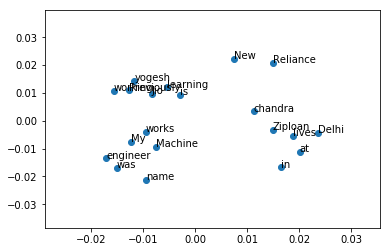

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

####  Google's Word2Vec Embedding
Training your own word vectors may be the best approach for a given NLP problem.

But it can take a long time, a fast computer with a lot of RAM and disk space, and perhaps some expertise in finessing the input data and training algorithm.

An alternative is to simply use an existing pre-trained word embedding.

##### A pre-trained model is nothing more than a file containing tokens and their associated word vectors. The pre-trained Google word2vec model was trained on Google news data (about 100 billion words); it contains 3 million words and phrases and was fit using 300-dimensional word vectors.


#### Standford's Glove Embedding
##### We can download the smallest GloVe pre-trained model from the GloVe website. It an 822 Megabyte zip file with 4 different models (50, 100, 200 and 300-dimensional vectors) trained on Wikipedia data with 6 billion tokens and a 400,000 word vocabulary